In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

D:\python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#import c02 data
data = sm.datasets.co2.load_pandas()
co2 = data.data

In [3]:
co2.head(5)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [4]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [5]:
#since its tough to work with weekly averages we will put these in monthly averages form
y = co2['co2'].resample('MS').mean()
#MS- start of month

In [6]:
y.head(5)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [7]:
# datestamp indices help us to filter data directly say after 1990
y['1990':]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
1991-02-01    355.650
1991-03-01    357.200
1991-04-01    358.600
1991-05-01    359.250
1991-06-01    358.180
1991-07-01    356.050
1991-08-01    353.860
1991-09-01    352.125
1991-10-01    352.250
1991-11-01    353.740
1991-12-01    355.025
1992-01-01    355.900
1992-02-01    356.680
1992-03-01    357.900
1992-04-01    359.075
1992-05-01    359.540
1992-06-01    359.125
               ...   
1999-07-01    369.000
1999-08-01    366.700
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
2000-02-01    369.375
2000-03-01    370.400
2000-04-01    371.540
2000-05-01    371.650
2000-06-01    371.625
2000-07-01    369.940
2000-08-01    367.950
2000-09-01

In [8]:
y['1995-10-01':'1996-10-01']

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

In [9]:
y.isnull().sum()# missing values in date time series

5

In [10]:
#to handle them fill them with closest not-null
y = y.fillna(y.bfill())
#prefer rolling mean over this

In [11]:
y.isnull().sum()

0

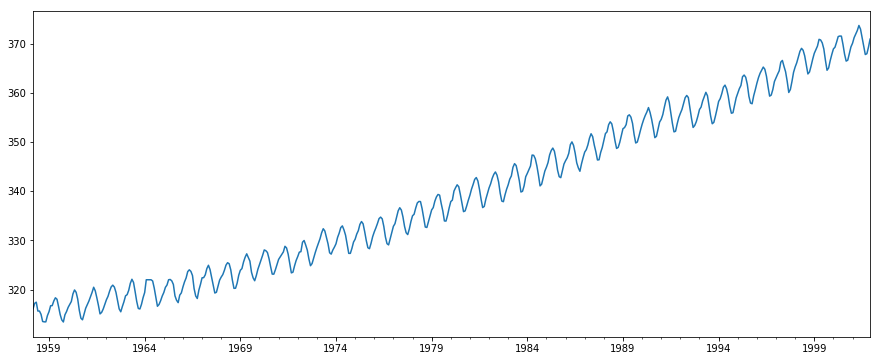

In [12]:
y.plot(figsize=(15, 6))
plt.show()

- seasonality: does the data display a clear periodic pattern?
- trend: does the data follow a consistent upwards or downward slope?
- noise: are there any outlier points or missing values that are not consistent with the rest of the data?

In [20]:
# time series decomposition into 3 components as above

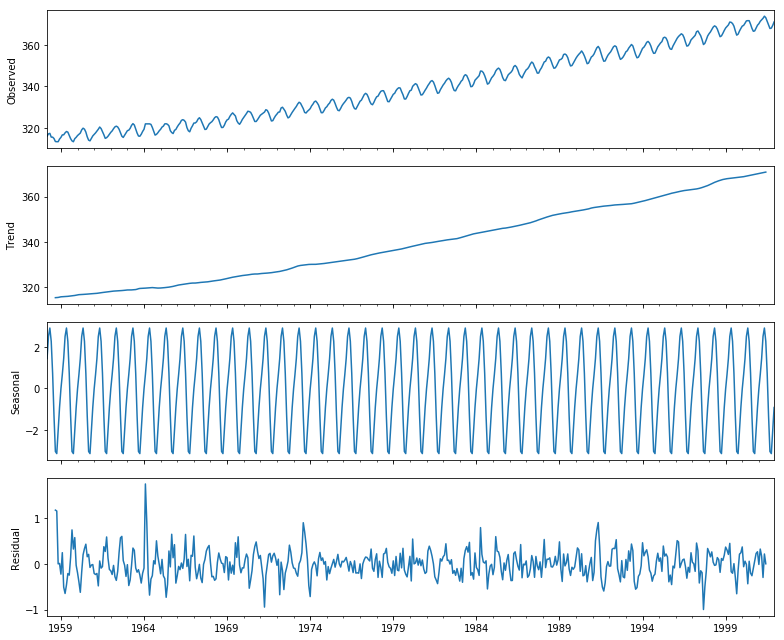

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
time_series_data=pd.read_csv(r"E:\Time-Series-Problem\time_series_data.csv",sep=',',error_bad_lines=False,low_memory = False,encoding='latin-1',parse_dates=True)
time_series_data['Date']=pd.to_datetime(time_series_data['Date'],format='%m/%d/%Y')

In [15]:
fer=time_series_data[time_series_data['Account ID']=='Ferrero'][['Date','Count']]

In [16]:
fer=fer.set_index('Date')

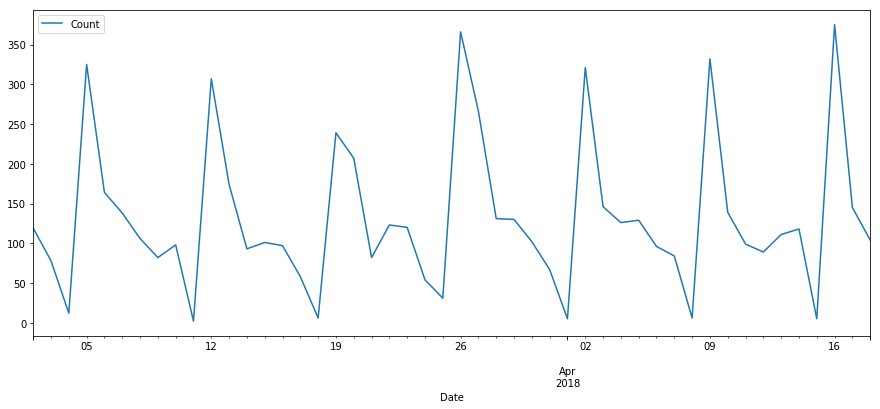

In [17]:
fer.plot(figsize=(15, 6))
plt.show()

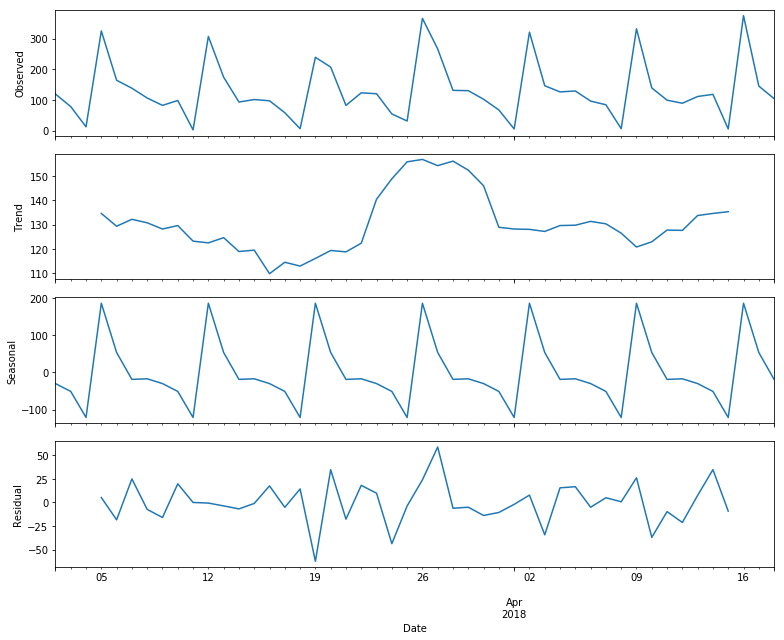

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(fer, model='additive')
fig = decomposition.plot()
plt.show()

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [33]:
# Time Series forecasting with ARIMA

In [19]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
data = sm.datasets.co2.load_pandas()
y = data.data
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.425000
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.400000


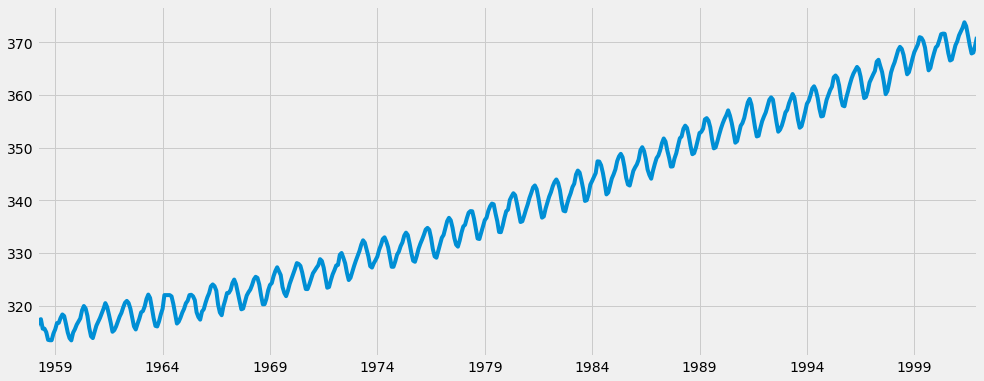

In [21]:
y.plot(figsize=(15, 6))
plt.show()

In [22]:
## ARIMA Time Series Modelling
#ARIMA -  AutoregRessive Integrated Moving Average.

In [23]:
#ARIMA(p,d,q)- seasonality,trend,noise

Step 3 — The ARIMA Time Series Model


One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

- p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model.  Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
- d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
- q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

When dealing with seasonal effects, we make use of the seasonal ARIMA, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

The seasonal ARIMA method can appear daunting because of the multiple tuning parameters involved. In the next section, we will describe how to automate the process of identifying the optimal set of parameters for the seasonal ARIMA time series model.

In [24]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624043257
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727638858
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320021
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878545588537
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.65789780726
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912955827
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754598261
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327394357
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067304665
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716865425
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1113.696716725417
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4315876419755
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893641971
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.091298905328
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194103
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385497181556
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.950175782907
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.928375962471
ARIMA

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


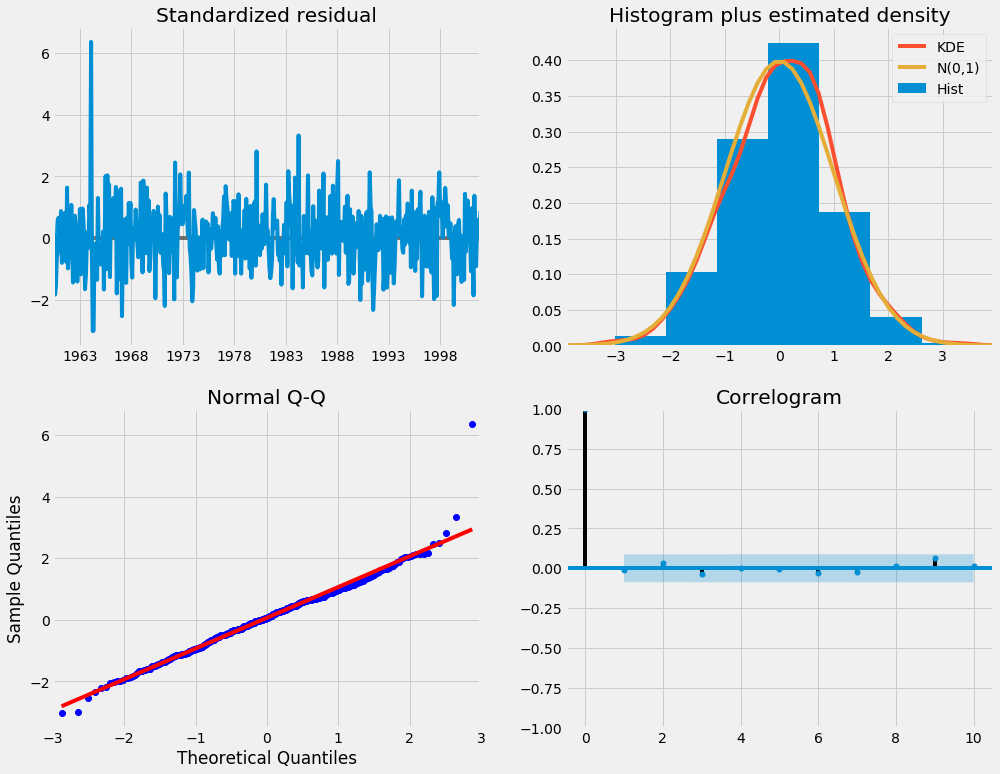

In [27]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [28]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

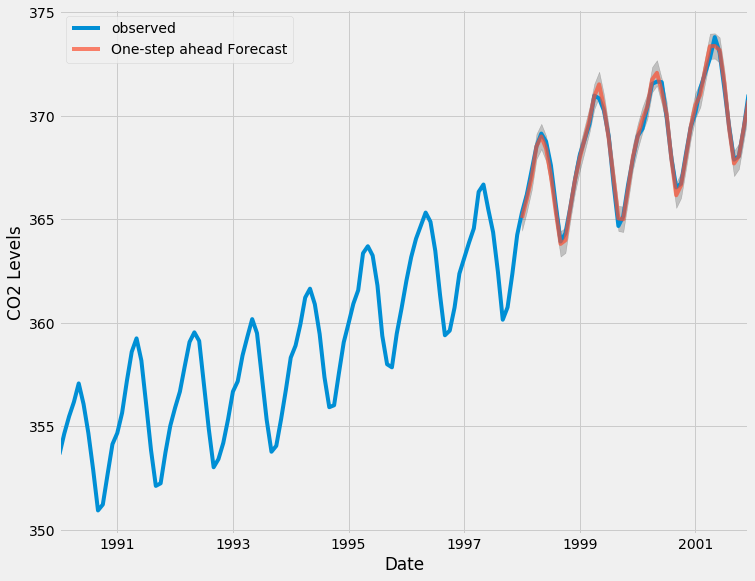

In [29]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [30]:
    y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [31]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

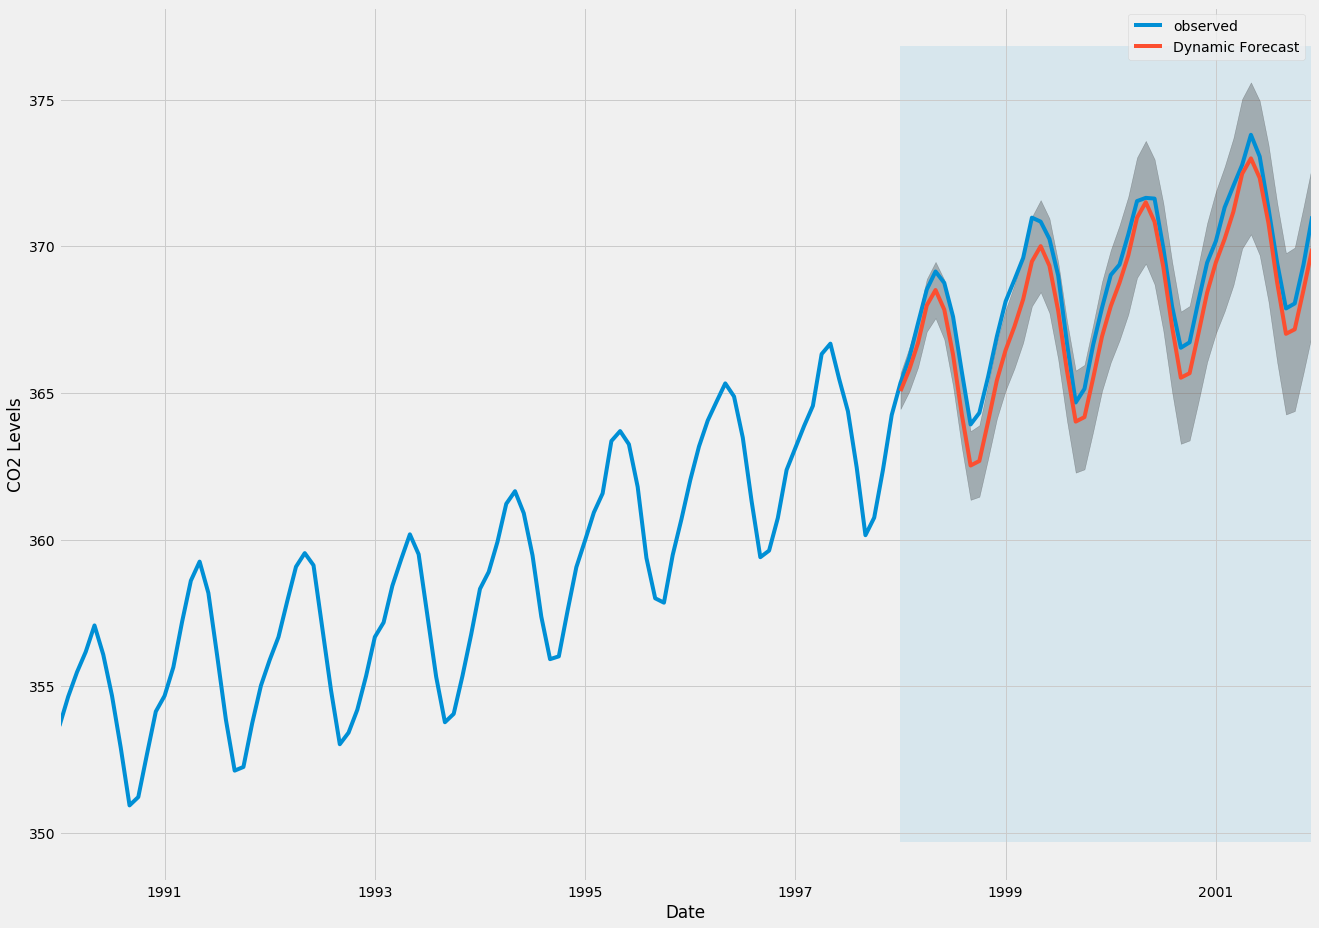

In [32]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [33]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [34]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

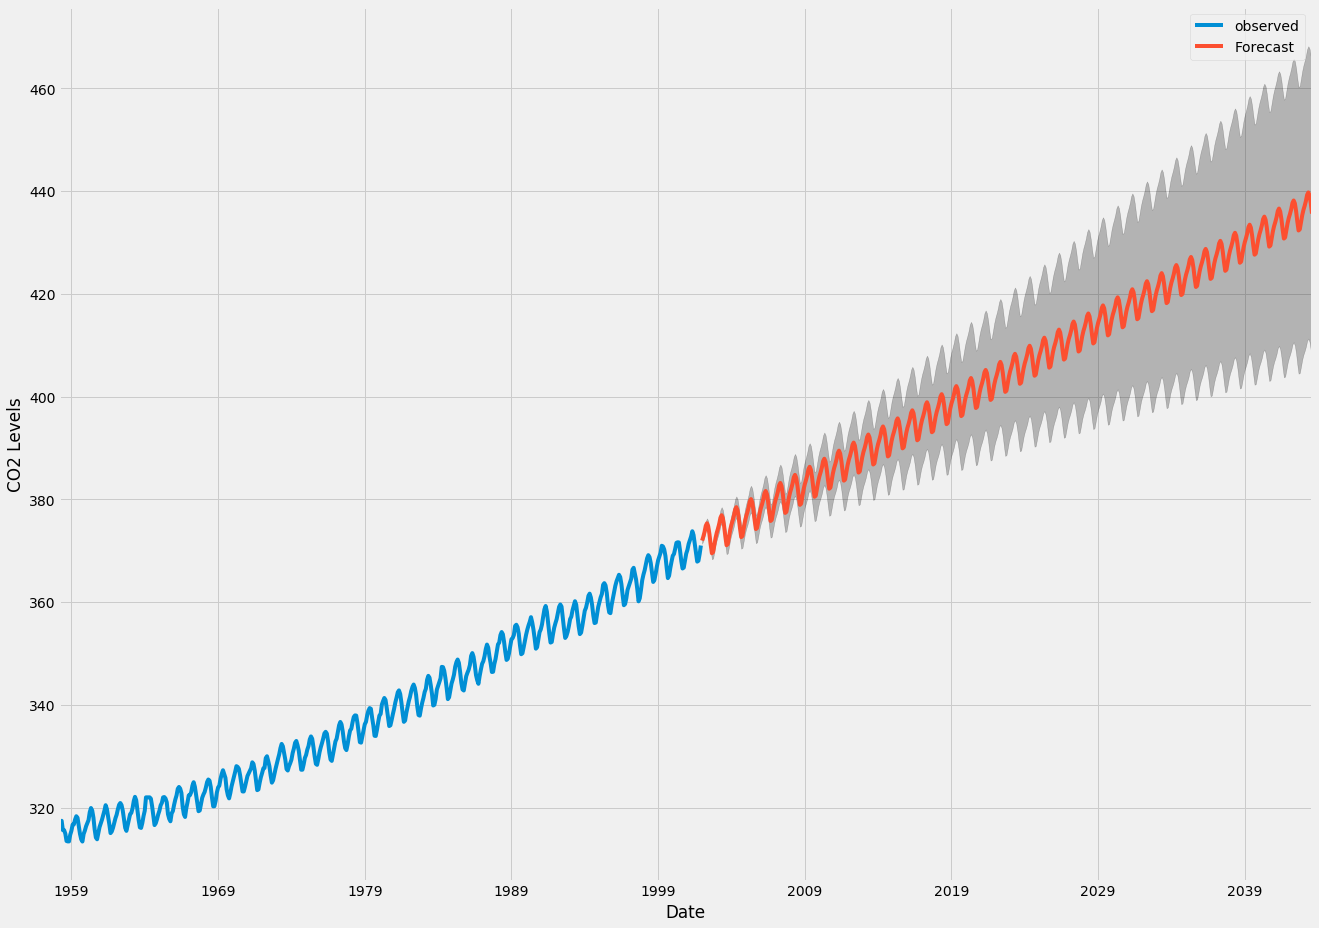

In [35]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [55]:
#with Prophet in python for time series 

In [36]:
#prophet by facebook for data analysis

In [40]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
df = pd.read_csv('E:\Time-Series-Problem\pydse-master\pydse\data\international-airline-passengers.csv',sep=';')

df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [45]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [52]:
df = df.rename(columns={'Month': 'ds',
                        'Passengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


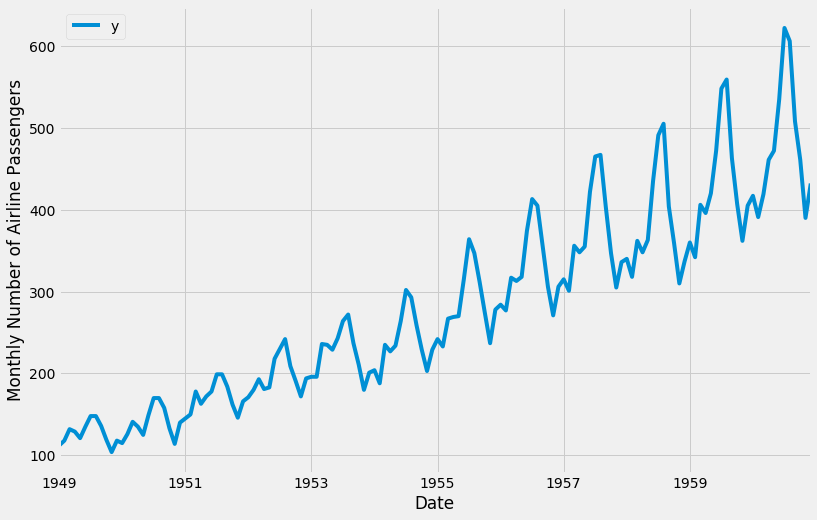

In [53]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [54]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [55]:
my_model.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [57]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.488539,607.520716,693.867328
176,1963-09-01,603.418980,559.898764,649.400345
177,1963-10-01,567.065050,520.436246,613.689581
178,1963-11-01,535.335567,491.200666,579.280873
179,1963-12-01,564.953015,519.253960,610.183069


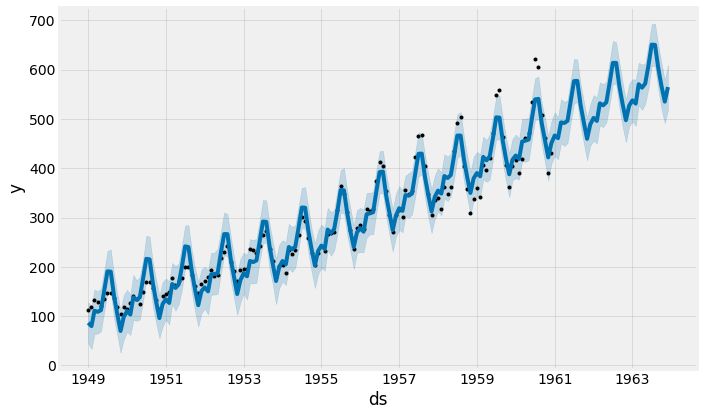

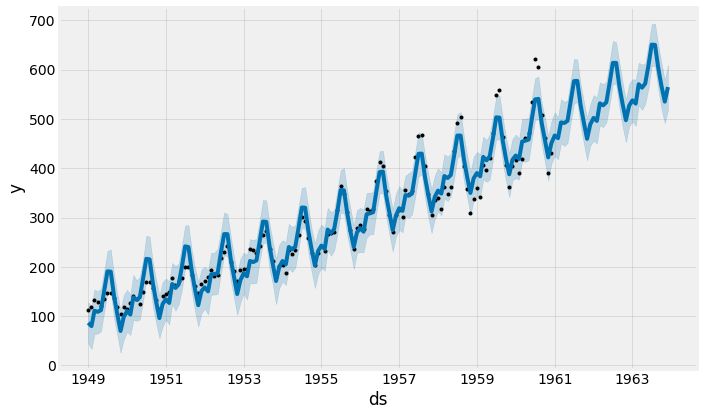

In [58]:
my_model.plot(forecast,
              uncertainty=True)

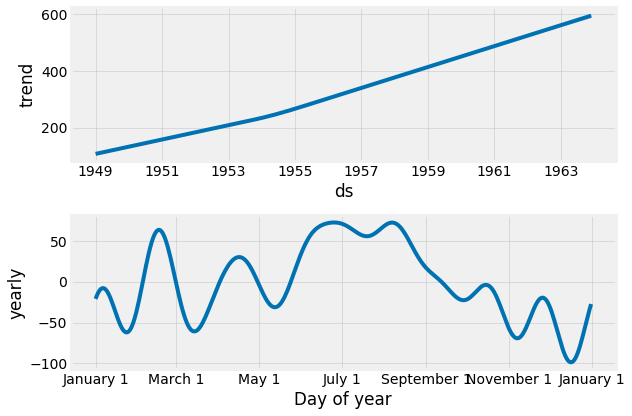

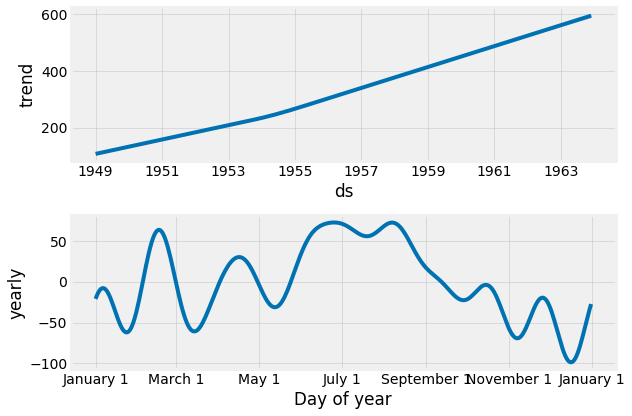

In [59]:
my_model.plot_components(forecast)

In [60]:
# solution by FBprophet

In [61]:
time_series_data=pd.read_csv(r"E:\Time-Series-Problem\time_series_data.csv",sep=',',error_bad_lines=False,low_memory = False,encoding='latin-1',parse_dates=True)
time_series_data['Date']=pd.to_datetime(time_series_data['Date'],format='%m/%d/%Y')

In [64]:
All_customers=time_series_data['Account ID'].unique()

In [131]:
train=time_series_data[time_series_data['Date']<='2018-04-12']
test=time_series_data[(time_series_data['Date']>'2018-04-12')&(time_series_data['Date']<'2018-04-17')]

In [132]:
test.shape

(402, 4)

In [133]:
diff=0
total=0
df=pd.DataFrame()
for x in All_customers:
    train_chunk=train[train['Account ID']==x][['Date','Count']]
    test_chunk=test[test['Account ID']==x][['Date','Count']]
    train_chunk['Date'] = pd.DatetimeIndex(train_chunk['Date'])
    test_chunk['Date'] = pd.DatetimeIndex(test_chunk['Date'])
    train_chunk = train_chunk.rename(columns={'Date': 'ds','Count': 'y'})
    test_chunk = test_chunk.rename(columns={'Date': 'ds','Count': 'y'})
    if (train_chunk.shape[0]>2)&(test_chunk.shape[0]!=0):
        my_model = Prophet(interval_width=0.8)
        my_model.fit(train_chunk)
        forecast = my_model.predict(test_chunk)
        final=pd.concat([forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],test_chunk.y.reset_index(drop=True)],axis=1)
        df=pd.concat([df,final[['y','yhat']]])
        #diff=diff+np.abs(final.y-final.yhat).sum()
        #total=total+final.y.sum()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 21.0.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.

In [126]:
df.to_csv('ab.csv')

In [134]:
np.abs(df.y-df.yhat).sum()/df.y.sum()

0.2969586148277897

In [124]:
df

,y,yhat
0,111,100.983054
1,118,71.461500
2,5,8.617795
3,375,312.958197
4,145,180.673945
5,104,109.508456
0,83,88.409099
1,10,22.408925
2,6,20.223542
3,59,82.197610


In [89]:
my_model = Prophet(interval_width=0.9)
my_model.fit(train_chunk)
#future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
#future_dates.tail()
forecast = my_model.predict(test_chunk)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [91]:
final=pd.concat([forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],test_chunk.y.reset_index(drop=True)],axis=1)

In [94]:
(np.abs(final.y-final.yhat).sum())/(final.y.sum())

0.19043991302749083

In [88]:
#my_model.plot(forecast,uncertainty=True)

In [1]:
## ARIMA